In [ ]:
def load_text_data(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.readlines()
    return text_data  # Returns a list of lines

# Input File Path
file_path = "Minor Tweets.txt"  # Replace with your file path

# Load Data
text_data = load_text_data(file_path)
print("Loaded Text Data:", text_data[:5])  # Display first 5 lines


Loaded Text Data: ['\ufeff1. @User1 (Jan 10, 2025): "Maha Kumbh 2025 is going to pump ₹2 lakh crore into UP’s economy! Local vendors and hotels are buzzing already. What a boost!"\n', '   * Economic Focus: Anticipated revenue and local business growth.\n', '2. @TravellerPriya (Jan 15, 2025): "Prayagraj is alive with Maha Kumbh energy! Boatmen earning big, shops packed—spiritual vibes with an economic win."\n', '   * Economic Focus: Increased earnings for boatmen and retail.\n', '3. @EcoWatcher (Feb 3, 2025): "₹3 lakh crore from Maha Kumbh? UP’s economy is soaring—tourism, jobs, and small businesses thriving. Incredible!"\n']


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # This is the additional resource needed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|\#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    return " ".join(tokens)

# Clean text data
cleaned_text = [clean_text(line) for line in text_data]
print("Cleaned Text:", cleaned_text[:5])  # Display first 5 cleaned lines


Cleaned Text: ['\ufeff jan maha kumbh is going to pump ₹ lakh crore into up ’ s economy local vendors and hotels are buzzing already what a boost', 'economic focus anticipated revenue and local business growth', 'jan prayagraj is alive with maha kumbh energy boatmen earning big shops packed—spiritual vibes with an economic win', 'economic focus increased earnings for boatmen and retail', 'feb ₹ lakh crore from maha kumbh up ’ s economy is soaring—tourism jobs and small businesses thriving incredible']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_text)

# Remove stopwords from text
filtered_text = [remove_stopwords(line) for line in cleaned_text]
print("Text after Stopword Removal:", filtered_text[:5])


Text after Stopword Removal: ['\ufeff jan maha kumbh going pump ₹ lakh crore ’ economy local vendors hotels buzzing already boost', 'economic focus anticipated revenue local business growth', 'jan prayagraj alive maha kumbh energy boatmen earning big shops packed—spiritual vibes economic win', 'economic focus increased earnings boatmen retail', 'feb ₹ lakh crore maha kumbh ’ economy soaring—tourism jobs small businesses thriving incredible']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_text)

# Lemmatize text
lemmatized_text = [lemmatize_text(line) for line in filtered_text]
print("Lemmatized Text:", lemmatized_text[:5])



[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatized Text: ['\ufeff jan maha kumbh going pump ₹ lakh crore ’ economy local vendor hotel buzzing already boost', 'economic focus anticipated revenue local business growth', 'jan prayagraj alive maha kumbh energy boatman earning big shop packed—spiritual vibe economic win', 'economic focus increased earnings boatman retail', 'feb ₹ lakh crore maha kumbh ’ economy soaring—tourism job small business thriving incredible']


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Extract named entities
named_entities = [extract_entities(line) for line in text_data]
print("Named Entities:", named_entities[:5])


Named Entities: [[('\ufeff1', 'ORG'), ('@User1', 'ORG'), ('(Jan 10, 2025', 'DATE'), ('Maha Kumbh 2025', 'PERSON'), ('2', 'MONEY')], [], [('2', 'CARDINAL'), ('(Jan 15, 2025', 'DATE'), ('Maha Kumbh', 'PERSON')], [], [('3', 'CARDINAL'), ('Feb 3, 2025', 'DATE'), ('3', 'MONEY'), ('Maha Kumbh', 'PERSON')]]


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score  # Returns {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.5}

# Analyze sentiment
sentiments = [get_sentiment(line) for line in lemmatized_text]
print("Sentiment Scores:", sentiments[:5])


Sentiment Scores: [{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}, {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818}, {'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.8176}, {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    "Original Text": text_data,
    "Cleaned Text": cleaned_text,
    "Lemmatized Text": lemmatized_text,
    "Sentiment": sentiments,
    "Named Entities": named_entities
})

# Save to CSV
df.to_csv("processed_sentiments.csv", index=False)

# Display first few rows
print(df.head())


                                       Original Text  \
0  ﻿1. @User1 (Jan 10, 2025): "Maha Kumbh 2025 is...   
1     * Economic Focus: Anticipated revenue and l...   
2  2. @TravellerPriya (Jan 15, 2025): "Prayagraj ...   
3     * Economic Focus: Increased earnings for bo...   
4  3. @EcoWatcher (Feb 3, 2025): "₹3 lakh crore f...   

                                        Cleaned Text  \
0  ﻿ jan maha kumbh is going to pump ₹ lakh crore...   
1  economic focus anticipated revenue and local b...   
2  jan prayagraj is alive with maha kumbh energy ...   
3  economic focus increased earnings for boatmen ...   
4  feb ₹ lakh crore from maha kumbh up ’ s econom...   

                                     Lemmatized Text  \
0  ﻿ jan maha kumbh going pump ₹ lakh crore ’ eco...   
1  economic focus anticipated revenue local busin...   
2  jan prayagraj alive maha kumbh energy boatman ...   
3   economic focus increased earnings boatman retail   
4  feb ₹ lakh crore maha kumbh ’ economy soari

Sentiment Category Counts:
Sentiment_Label
Neutral     443
Positive    156
Negative     69
Name: count, dtype: int64

Average Compound Sentiment Score: 0.075


<ipython-input-9-c551a42d4d56>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=df, palette='coolwarm')


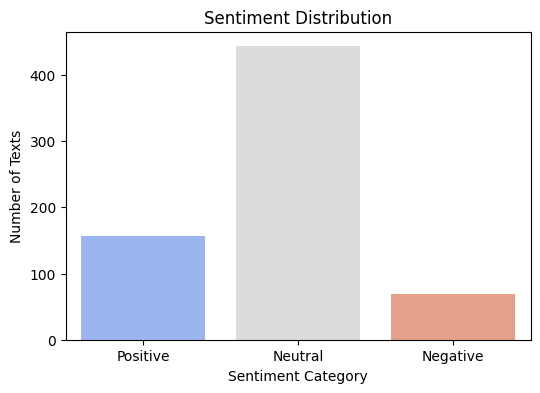

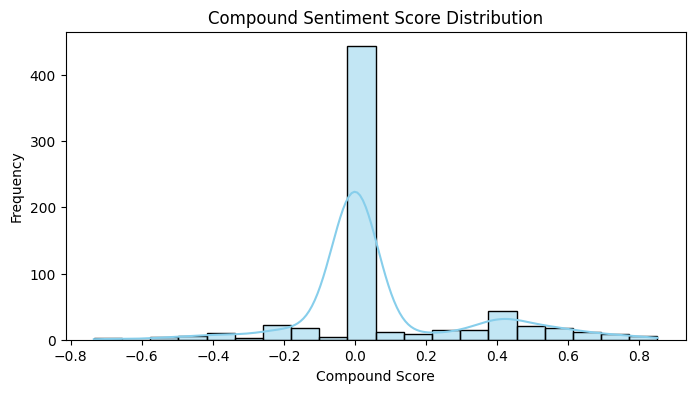

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for sentiment label
df['Sentiment_Label'] = df['Sentiment'].apply(
    lambda x: 'Positive' if x['compound'] > 0.05 else 'Negative' if x['compound'] < -0.05 else 'Neutral'
)

# Count of each sentiment category
sentiment_counts = df['Sentiment_Label'].value_counts()
print("Sentiment Category Counts:")
print(sentiment_counts)

# Average compound sentiment score
avg_compound = df['Sentiment'].apply(lambda x: x['compound']).mean()
print("\nAverage Compound Sentiment Score: {:.3f}".format(avg_compound))

# Bar plot of sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment_Label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Texts')
plt.show()

# Histogram of compound scores
df['Compound_Score'] = df['Sentiment'].apply(lambda x: x['compound'])

plt.figure(figsize=(8,4))
sns.histplot(df['Compound_Score'], bins=20, kde=True, color='skyblue')
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


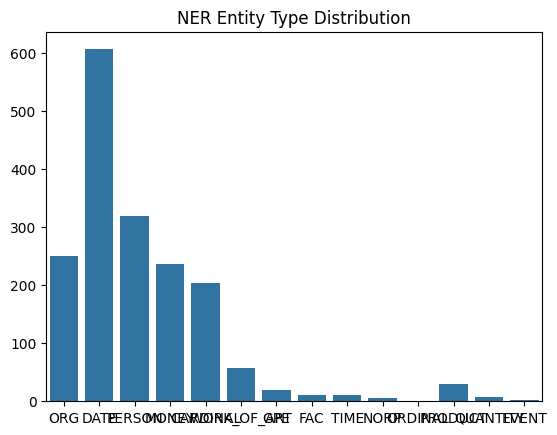

In [ ]:
from collections import Counter
entities = df['Named Entities'].explode().dropna()
entity_counts = Counter([ent[1] for ent in entities])
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
plt.title("NER Entity Type Distribution")
plt.show()

In [ ]:
pip install transformers torch pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Optional: show progress bar nicely
tqdm.pandas()

# Load your preprocessed data
df = pd.read_csv("processed_sentiments.csv")

# Load Hugging Face sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Run sentiment analysis on each row (use Cleaned Text or Lemmatized Text)
def classify_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]  # Truncate to 512 tokens if needed
        return result['label']
    except:
        return "ERROR"

# Apply the pipeline and save results
df['BERT_Sentiment_Label'] = df['Cleaned Text'].progress_apply(classify_sentiment)

# Save results to new CSV
df.to_csv("bert_sentiments.csv", index=False)

# Show sample output
print(df[['Cleaned Text', 'BERT_Sentiment_Label']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu
100%|██████████| 668/668 [00:51<00:00, 13.10it/s]

                                        Cleaned Text BERT_Sentiment_Label
0  ﻿ jan maha kumbh is going to pump ₹ lakh crore...             POSITIVE
1  economic focus anticipated revenue and local b...             POSITIVE
2  jan prayagraj is alive with maha kumbh energy ...             POSITIVE
3  economic focus increased earnings for boatmen ...             POSITIVE
4  feb ₹ lakh crore from maha kumbh up ’ s econom...             POSITIVE


In [ ]:
import pandas as pd

# Load the DataFrame (you should have run BERT already)
df = pd.read_csv("bert_sentiments.csv")

# Preview unique sentiment labels
print("Sentiment Labels Found:", df['BERT_Sentiment_Label'].unique())

# Display POSITIVE tweets
print("\n📗 Positive Samples:")
print(df[df['BERT_Sentiment_Label'] == 'POSITIVE']['Original Text'].head(5).to_string(index=False))

# Display NEGATIVE tweets
print("\n📕 Negative Samples:")
print(df[df['BERT_Sentiment_Label'] == 'NEGATIVE']['Original Text'].head(5).to_string(index=False))

# Optional: Display NEUTRAL tweets (if your model supports it)
if 'NEUTRAL' in df['BERT_Sentiment_Label'].unique():
    print("\n📘 Neutral Samples:")
    print(df[df['BERT_Sentiment_Label'] == 'NEUTRAL']['Original Text'].head(5).to_string(index=False))


Sentiment Labels Found: ['POSITIVE' 'NEGATIVE' 'ERROR']

📗 Positive Samples:
﻿1. @User1 (Jan 10, 2025): "Maha Kumbh 2025 is ...
   * Economic Focus: Anticipated revenue and lo...
2. @TravellerPriya (Jan 15, 2025): "Prayagraj i...
   * Economic Focus: Increased earnings for boa...
3. @EcoWatcher (Feb 3, 2025): "₹3 lakh crore fr...

📕 Negative Samples:
4. @PilgrimSoul (Jan 20, 2025): "Bought souveni...
6. @NewsJunkie (Dec 28, 2024): "Govt says Maha ...
   * Economic Focus: Skepticism about economic ...
7. @DataNerd (Jan 13, 2025): "Maha Kumbh starts...
   * Economic Focus: Statistical breakdown of e...


📊 Sentiment Counts:
BERT_Sentiment_Label
NEGATIVE    355
POSITIVE    276
ERROR        37
Name: count, dtype: int64


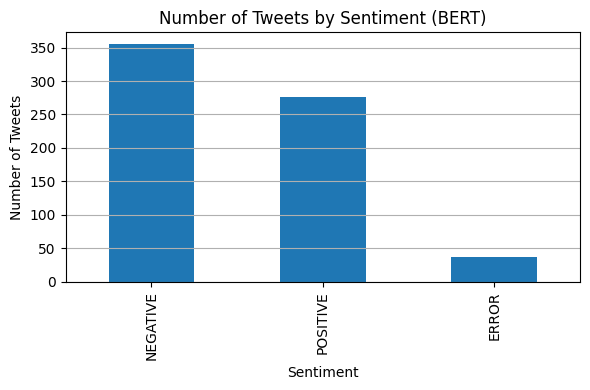

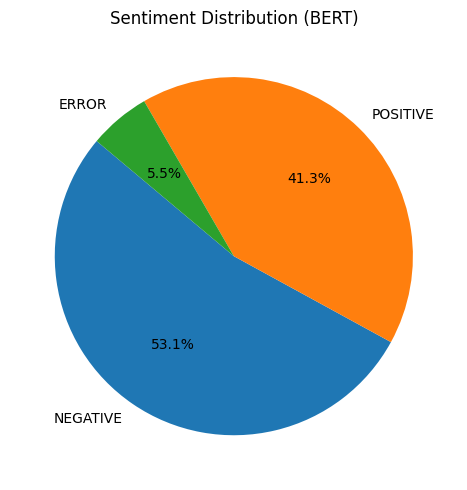

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your BERT-labeled dataset
df = pd.read_csv("bert_sentiments.csv")

# Count the sentiment labels
sentiment_counts = df['BERT_Sentiment_Label'].value_counts()

# Print the counts
print("📊 Sentiment Counts:")
print(sentiment_counts)

# Bar Chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar')
plt.title("Number of Tweets by Sentiment (BERT)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution (BERT)")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()



✅ Accuracy: 0.3900

📊 Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.25      0.56      0.35        25
     NEUTRAL       0.00      0.00      0.00        15
    POSITIVE       0.57      0.42      0.48        60

    accuracy                           0.39       100
   macro avg       0.27      0.33      0.28       100
weighted avg       0.40      0.39      0.37       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


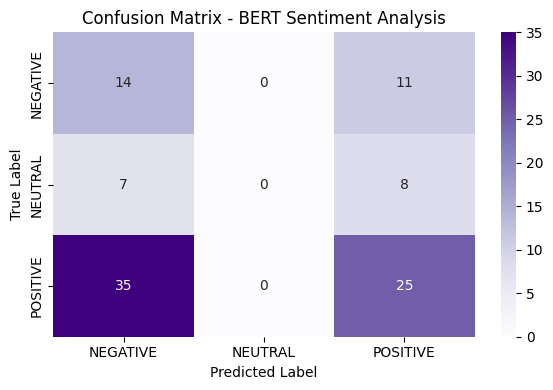

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSVs
bert_df = pd.read_csv("bert_sentiments.csv")
true_df = pd.read_csv("True_Label.csv", encoding='ISO-8859-1')

# Detect the label column
label_col = None
for col in true_df.columns:
    if 'label' in col.lower() or 'sentiment' in col.lower():
        label_col = col
        break

if not label_col:
    raise ValueError("Could not find a label column!")

# Trim to match
min_len = min(len(bert_df), len(true_df))
bert_df = bert_df.iloc[:min_len].copy()
true_df = true_df.iloc[:min_len].copy()

# Normalize both labels to uppercase
bert_df['BERT_Sentiment_Label'] = bert_df['BERT_Sentiment_Label'].str.upper().str.strip()
true_df[label_col] = true_df[label_col].str.upper().str.strip()

# Add true labels
bert_df['True_Label'] = true_df[label_col]

# Evaluation
y_true = bert_df['True_Label']
y_pred = bert_df['BERT_Sentiment_Label']

# Metrics
accuracy = accuracy_score(y_true, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
labels = sorted(list(set(y_true) | set(y_pred)))
conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BERT Sentiment Analysis")
plt.tight_layout()
plt.show()


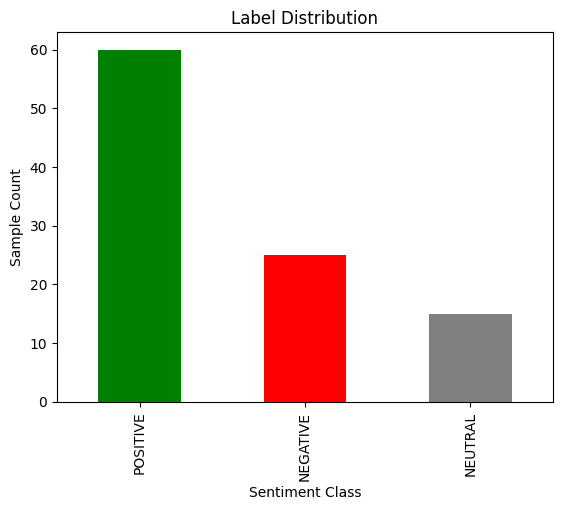

In [ ]:
import matplotlib.pyplot as plt

df['True_Label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Label Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Sample Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.55
F1 Score (weighted): 0.43

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.20      0.33         5
     Neutral       0.00      0.00      0.00         5
    Positive       0.53      1.00      0.69        10

    accuracy                           0.55        20
   macro avg       0.51      0.40      0.34        20
weighted avg       0.51      0.55      0.43        20



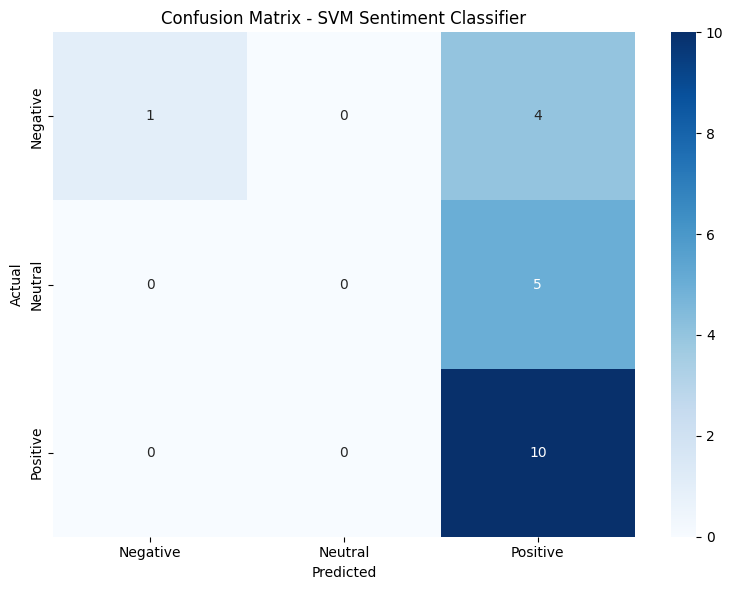

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load labeled CSV
df = pd.read_csv("True_Label.csv", encoding='ISO-8859-1')  # or encoding='latin1'


# 2. Clean data and encode labels
df = df.dropna(subset=['text', 'label'])
df = df[df['label'].isin(['Positive', 'Negative', 'Neutral'])]

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])  # e.g., Negative → 0, Neutral → 1, Positive → 2

# 3. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['text'])
y = df['label_encoded']

# 4. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train SVM model
clf = LinearSVC()
clf.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=le.classes_)

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

# 8. Display Results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (weighted): {f1:.2f}")
print("\nClassification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Sentiment Classifier")
plt.tight_layout()
plt.show()


✅ Saved SVM predictions to svm_labeled_minor_tweets.csv


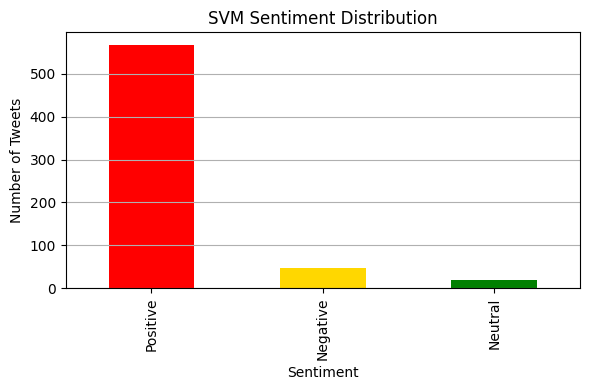

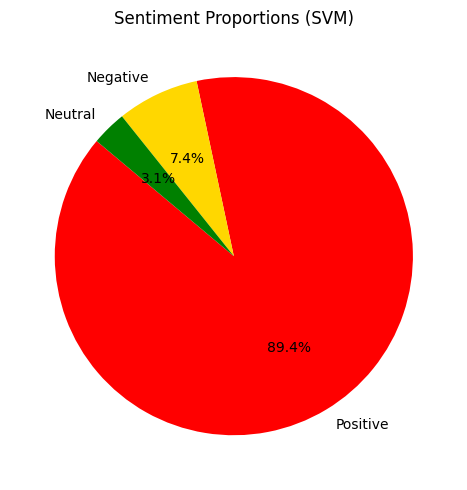

In [ ]:
# 9. Load full unlabeled dataset
with open("Minor Tweets.txt", "r", encoding="utf-8", errors="ignore") as f:
    tweets = [line.strip() for line in f if line.strip()]

df_unlabeled = pd.DataFrame(tweets, columns=["text"])

# 10. Transform full dataset using same TF-IDF vectorizer
X_unlabeled = vectorizer.transform(df_unlabeled["text"])

# 11. Predict using trained SVM
predicted_encoded = clf.predict(X_unlabeled)
df_unlabeled["Predicted_Sentiment"] = le.inverse_transform(predicted_encoded)

# 12. Save predictions
df_unlabeled.to_csv("svm_labeled_minor_tweets.csv", index=False)
print("✅ Saved SVM predictions to svm_labeled_minor_tweets.csv")

# 13. Visualize sentiment distribution
sentiment_counts = df_unlabeled["Predicted_Sentiment"].value_counts()

# Bar Chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["red", "gold", "green"])
plt.title("SVM Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["red", "gold", "green"])
plt.title("Sentiment Proportions (SVM)")
plt.ylabel("")
plt.tight_layout()
plt.show()


📊 Training Set Performance:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        25
     Neutral       1.00      1.00      1.00        15
    Positive       1.00      1.00      1.00        60

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



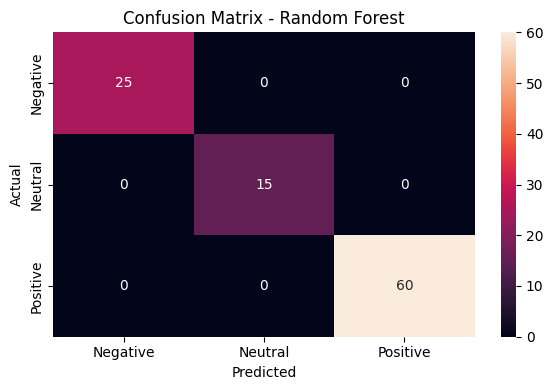

✅ Saved classified tweets to randomforest_labeled_tweets.csv


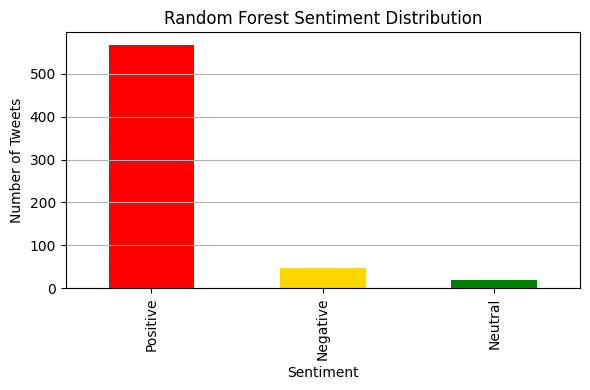

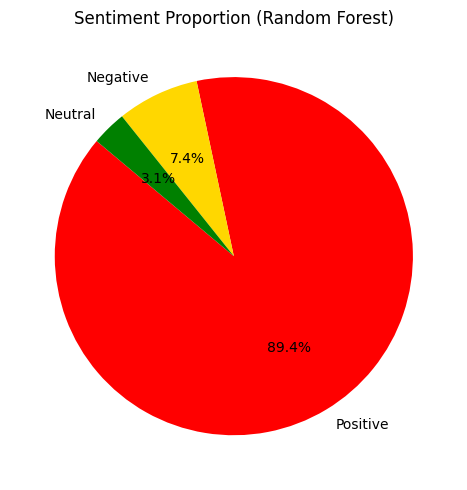

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Load labeled training data
df_train = pd.read_csv("True_Label.csv", encoding='ISO-8859-1')
df_train = df_train.dropna(subset=['text', 'label'])

# Encode sentiment labels (e.g., Negative → 0, Neutral → 1, Positive → 2)
label_encoder = LabelEncoder()
df_train['label_encoded'] = label_encoder.fit_transform(df_train['label'])

# Convert training text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(df_train['text'])
y_train = df_train['label_encoded']

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on training set (you can split and test more rigorously too)
y_pred = rf_model.predict(X_train)
print("📊 Training Set Performance:")
print(classification_report(y_train, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# Part 2: Load full unlabeled dataset
with open("Minor Tweets.txt", "r", encoding="utf-8", errors="ignore") as f:
    tweets = [line.strip() for line in f if line.strip()]
df_unlabeled = pd.DataFrame(tweets, columns=["text"])

# Vectorize full dataset using same TF-IDF vectorizer
X_unlabeled = vectorizer.transform(df_unlabeled["text"])

# Part 3: Predict sentiments on full dataset
predicted_labels = rf_model.predict(X_unlabeled)
df_unlabeled["Predicted_Sentiment"] = label_encoder.inverse_transform(predicted_labels)

# Save results to CSV
df_unlabeled.to_csv("randomforest_labeled_tweets.csv", index=False)
print("✅ Saved classified tweets to randomforest_labeled_tweets.csv")

# Optional: Visualization
sentiment_counts = df_unlabeled["Predicted_Sentiment"].value_counts()

# Bar Chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["red", "gold", "green"])
plt.title("Random Forest Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["red", "gold", "green"])
plt.title("Sentiment Proportion (Random Forest)")
plt.ylabel("")
plt.tight_layout()
plt.show()


📊 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.20      0.33         5
     Neutral       0.00      0.00      0.00         5
    Positive       0.53      1.00      0.69        10

    accuracy                           0.55        20
   macro avg       0.51      0.40      0.34        20
weighted avg       0.51      0.55      0.43        20

✅ Accuracy: 0.55


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


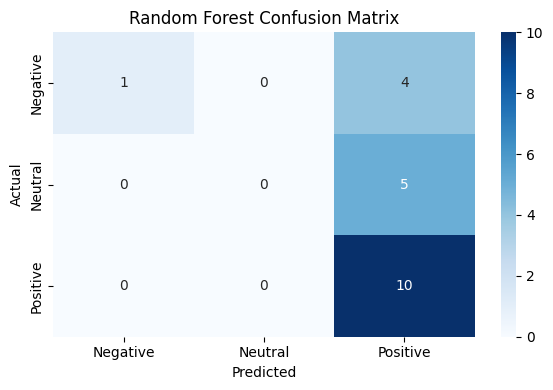

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification metrics
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 2))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()


✅ Predictions saved to minor_tweets_labeled_rf.csv


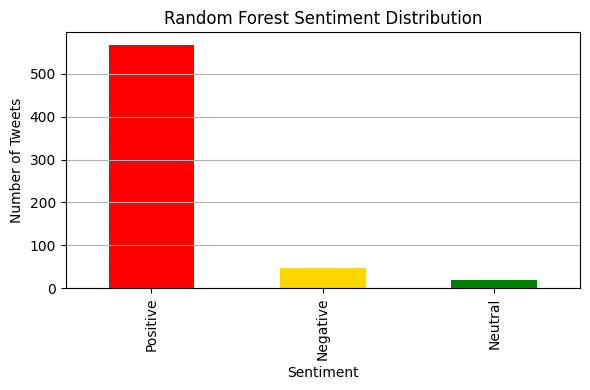

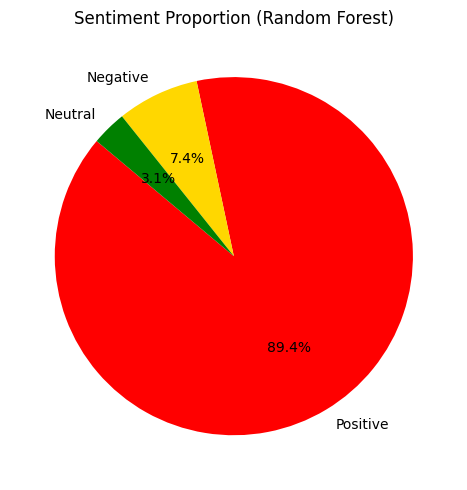

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your labeled training data (used to train RF model)
df_train = pd.read_csv("True_Label.csv", encoding='ISO-8859-1')
df_train = df_train.dropna(subset=['text', 'label'])

# Encode labels
le = LabelEncoder()
df_train['label_encoded'] = le.fit_transform(df_train['label'])

# Vectorize training text
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(df_train['text'])
y_train = df_train['label_encoded']

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ✅ Load the full Minor Tweets.txt
with open("Minor Tweets.txt", "r", encoding="utf-8", errors="ignore") as f:
    tweets = [line.strip() for line in f if line.strip()]

df_unlabeled = pd.DataFrame(tweets, columns=["text"])

# Vectorize Minor Tweets using the same vectorizer
X_unlabeled = vectorizer.transform(df_unlabeled["text"])

# Predict using trained Random Forest
predicted_labels = clf.predict(X_unlabeled)
df_unlabeled["Predicted_Sentiment"] = le.inverse_transform(predicted_labels)

# Save to CSV
df_unlabeled.to_csv("minor_tweets_labeled_rf.csv", index=False)
print("✅ Predictions saved to minor_tweets_labeled_rf.csv")

# 🎯 Optional Visualization
sentiment_counts = df_unlabeled["Predicted_Sentiment"].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["red", "gold", "green"])
plt.title("Random Forest Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(5, 5))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["red", "gold", "green"])
plt.title("Sentiment Proportion (Random Forest)")
plt.ylabel("")
plt.tight_layout()
plt.show()


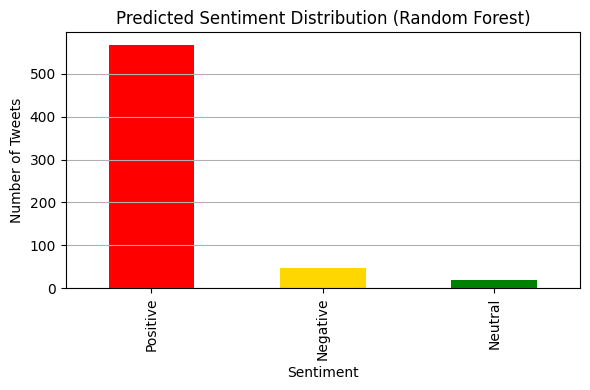

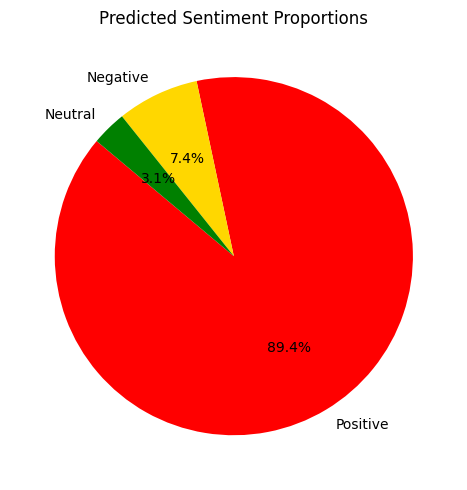

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load predicted output
df = pd.read_csv("minor_tweets_labeled_rf.csv")

# Count the number of tweets per sentiment
sentiment_counts = df["Predicted_Sentiment"].value_counts()

# Bar Chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["red", "gold", "green"])
plt.title("Predicted Sentiment Distribution (Random Forest)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["red", "gold", "green"])
plt.title("Predicted Sentiment Proportions")
plt.ylabel("")
plt.tight_layout()
plt.show()
